In [ ]:
%%capture
!wget https://dlcdn.apache.org/spark/spark-3.4.1/spark-3.4.1-bin-hadoop3.tgz
!tar xvzf spark-3.4.1-bin-hadoop3.tgz
!pip install findspark

In [ ]:
#local storage connection with Hadoop, os environment set
import os
os.environ["Spark_Home"] = "/content/spark-3.4.1-bin-hadoop3"

import findspark
findspark.init
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
spark = SparkSession.builder.appName("pySpark 3.4.1 on google colab").getOrCreate()

In [ ]:
df = spark.read.csv(header=True, inferSchema=True, path="/content/drive/MyDrive/9th semester/Data set/Rokomari - outlate added.csv")
df.printSchema
df.show()

+--------------------+--------------------+--------------------+--------------------+--------------+-------------+--------+------------+------+--------------------+------------+
|               Title|        sub_category|            category|             Authors|Original Price|Selling Price|Discount|Rating Count|Rating|        Publisher_en|outlete_size|
+--------------------+--------------------+--------------------+--------------------+--------------+-------------+--------+------------+------+--------------------+------------+
|Evil spirits (har...|supernatural and ...|novel and literature|       Mushtaq Ahmed|           200|          156|      44|        10.0|   4.2|Declaration of un...|       small|
|Smart English Sma...|english grammar a...|         educational|         Farid Ahmed|           250|          188|      62|       137.0|  3.74|  Farid Publications|      medium|
|What will people ...|self development ...|          daily life|         Ayman Sadiq|           255|          

In [ ]:
df.printSchema()

root
 |-- Title: string (nullable = true)
 |-- sub_category: string (nullable = true)
 |-- category: string (nullable = true)
 |-- Authors: string (nullable = true)
 |-- Original Price: string (nullable = true)
 |-- Selling Price: string (nullable = true)
 |-- Discount: integer (nullable = true)
 |-- Rating Count: double (nullable = true)
 |-- Rating: double (nullable = true)
 |-- Publisher_en: string (nullable = true)
 |-- outlete_size: string (nullable = true)



In [ ]:
df.filter(df.Authors.isNull()).show()

+-----+------------+--------+-------+--------------+-------------+--------+------------+------+------------+------------+
|Title|sub_category|category|Authors|Original Price|Selling Price|Discount|Rating Count|Rating|Publisher_en|outlete_size|
+-----+------------+--------+-------+--------------+-------------+--------+------------+------+------------+------------+
+-----+------------+--------+-------+--------------+-------------+--------+------------+------+------------+------------+



In [ ]:
for col_name in df.columns:
    null_count = df.filter(col(col_name).isNull()).count()

    print(f"Column '{col_name}' has {null_count} null values.")

Column 'Title' has 0 null values.
Column 'sub_category' has 0 null values.
Column 'category' has 0 null values.
Column 'Authors' has 0 null values.
Column 'Original Price' has 0 null values.
Column 'Selling Price' has 0 null values.
Column 'Discount' has 0 null values.
Column 'Rating Count' has 0 null values.
Column 'Rating' has 0 null values.
Column 'Publisher_en' has 0 null values.
Column 'outlete_size' has 0 null values.


In [ ]:
df=df.withColumn("Original Price", df["Original Price"].cast("Integer"))
df=df.withColumn("Selling Price", df["Selling Price"].cast("Integer"))

In [ ]:
df.printSchema()

root
 |-- Title: string (nullable = true)
 |-- sub_category: string (nullable = true)
 |-- category: string (nullable = true)
 |-- Authors: string (nullable = true)
 |-- Original Price: integer (nullable = true)
 |-- Selling Price: integer (nullable = true)
 |-- Discount: integer (nullable = true)
 |-- Rating Count: double (nullable = true)
 |-- Rating: double (nullable = true)
 |-- Publisher_en: string (nullable = true)
 |-- outlete_size: string (nullable = true)



In [ ]:
from pyspark.ml.feature import (StringIndexer, OneHotEncoder, VectorAssembler)

In [ ]:
category_col = ['Title','sub_category', 'category', 'Authors', 'Publisher_en', 'outlete_size']

In [ ]:
from pyspark.sql.functions import col, count

for i in category_col:
  df.groupBy(i).agg(count(i)).show()

In [ ]:
from pyspark.ml.feature import (StringIndexer, OneHotEncoder, VectorAssembler)
indexers=[]
for i in category_col:
  indx = StringIndexer(inputCol=col_name, outputCol=f"{i}_num")
  indexers.append(indx)

for indexer in indexers:
  df=indexer.fit(df).transform(df)
df.show(3, truncate=False)


+----------------------------------------------------+--------------------------------------+--------------------+-------------+--------------+-------------+--------+------------+------+--------------------------+------------+---------+----------------+------------+-----------+----------------+----------------+
|Title                                               |sub_category                          |category            |Authors      |Original Price|Selling Price|Discount|Rating Count|Rating|Publisher_en              |outlete_size|Title_num|sub_category_num|category_num|Authors_num|Publisher_en_num|outlete_size_num|
+----------------------------------------------------+--------------------------------------+--------------------+-------------+--------------+-------------+--------+------------+------+--------------------------+------------+---------+----------------+------------+-----------+----------------+----------------+
|Evil spirits (hardcover)                            |superna

In [ ]:
df2=df2.drop(*category_col)
df2=df2.drop('outlete_size_num')
df2.show(2)

+--------------+-------------+--------+------------+------+---------+----------------+------------+-----------+----------------+
|Original Price|Selling Price|Discount|Rating Count|Rating|Title_num|sub_category_num|category_num|Authors_num|Publisher_en_num|
+--------------+-------------+--------+------------+------+---------+----------------+------------+-----------+----------------+
|           200|          156|      44|        10.0|   4.2|      1.0|             1.0|         1.0|        1.0|             1.0|
|           250|          188|      62|       137.0|  3.74|      0.0|             0.0|         0.0|        0.0|             0.0|
+--------------+-------------+--------+------------+------+---------+----------------+------------+-----------+----------------+
only showing top 2 rows



In [ ]:
asm = VectorAssembler(
 inputCols=['Original Price', 'Selling Price', 'Discount', 'Rating Count', 'Rating' ,'Title_num','sub_category_num', 'category_num', 'Authors_num', 'Publisher_en_num'],
 outputCol="Features",handleInvalid="skip")
df = asm.transform(df)
df.show(10, truncate=False)

+---------------------------------------------------------------------------------+--------------------------------------+--------------------+--------------------------------------+--------------+-------------+--------+------------+------+--------------------------+------------+---------+----------------+------------+-----------+----------------+----------------+-----------------------------------------------+
|Title                                                                            |sub_category                          |category            |Authors                               |Original Price|Selling Price|Discount|Rating Count|Rating|Publisher_en              |outlete_size|Title_num|sub_category_num|category_num|Authors_num|Publisher_en_num|outlete_size_num|Features                                       |
+---------------------------------------------------------------------------------+--------------------------------------+--------------------+---------------------------

In [ ]:
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml import Pipeline

# Create a MinMaxScaler to normalize the features
scaler = MinMaxScaler(inputCol="Features", outputCol="scaled_features")
scaler_model = scaler.fit(df)

normalized_data = scaler_model.transform(df)

# Show the normalized data
normalized_data.select("Features", "scaled_features").show()

+--------------------+--------------------+
|            Features|     scaled_features|
+--------------------+--------------------+
|[200.0,156.0,44.0...|[0.20202020202020...|
|(10,[0,1,2,3,4],[...|(10,[0,1,2,3,4],[...|
|(10,[0,1,2,3,4],[...|(10,[0,1,2,3,4],[...|
|(10,[0,1,2,3,4],[...|(10,[0,1,2,3,4],[...|
|(10,[0,1,2,3,4],[...|(10,[0,1,2,3,4],[...|
|(10,[0,1,2,3,4],[...|(10,[0,1,2,3,4],[...|
|(10,[0,1,2,3,4],[...|(10,[0,1,2,3,4],[...|
|(10,[0,1,2,3,4],[...|(10,[0,1,2,3,4],[...|
|(10,[0,1,2,3,4],[...|(10,[0,1,2,3,4],[...|
|(10,[0,1,2,3,4],[...|(10,[0,1,2,3,4],[...|
|(10,[0,1,2,3,4],[...|(10,[0,1,2,3,4],[...|
|(10,[0,1,2,3,4],[...|(10,[0,1,2,3,4],[...|
|[100.0,70.0,30.0,...|[0.10101010101010...|
|(10,[0,1,2,3,4],[...|(10,[0,1,2,3,4],[...|
|(10,[0,1,2,3,4],[...|(10,[0,1,2,3,4],[...|
|[50.0,35.0,15.0,8...|[0.05050505050505...|
|(10,[0,1,2,3,4],[...|(10,[0,1,2,3,4],[...|
|(10,[0,1,2,3,4],[...|(10,[0,1,2,3,4],[...|
|(10,[0,1,2,3,4],[...|(10,[0,1,2,3,4],[...|
|[60.0,42.0,18.0,1...|[0.0606060

In [ ]:
finalData = normalized_data.select("scaled_features","outlete_size_num")
finalData.show()

+--------------------+----------------+
|     scaled_features|outlete_size_num|
+--------------------+----------------+
|[0.20202020202020...|             1.0|
|(10,[0,1,2,3,4],[...|             0.0|
|(10,[0,1,2,3,4],[...|             0.0|
|(10,[0,1,2,3,4],[...|             0.0|
|(10,[0,1,2,3,4],[...|             0.0|
|(10,[0,1,2,3,4],[...|             0.0|
|(10,[0,1,2,3,4],[...|             0.0|
|(10,[0,1,2,3,4],[...|             0.0|
|(10,[0,1,2,3,4],[...|             0.0|
|(10,[0,1,2,3,4],[...|             0.0|
|(10,[0,1,2,3,4],[...|             0.0|
|(10,[0,1,2,3,4],[...|             0.0|
|[0.10101010101010...|             1.0|
|(10,[0,1,2,3,4],[...|             0.0|
|(10,[0,1,2,3,4],[...|             0.0|
|[0.05050505050505...|             1.0|
|(10,[0,1,2,3,4],[...|             0.0|
|(10,[0,1,2,3,4],[...|             0.0|
|(10,[0,1,2,3,4],[...|             0.0|
|[0.06060606060606...|             1.0|
+--------------------+----------------+
only showing top 20 rows



In [ ]:
df.count()

6355

In [ ]:
from pyspark.sql.functions import countDistinct, avg, stddev
column_subset = df.columns
for cols in column_subset:
    if df.select(cols).dtypes[0][1]=="Integer":
        mean = df.agg({cols:'mean'}).collect()[0][0]
        stddev = df.agg({'Original Price':'stddev'}).collect()[0][0]
        upper_limit = mean + (3*stddev)
        lower_limit = mean - (3*stddev)
        df = df.filter((df[cols]>lower_limit) & (df[cols]<upper_limit))
df.show(5)

+--------------------+--------------------+--------------------+--------------------+--------------+-------------+--------+------------+------+--------------------+------------+---------+----------------+------------+-----------+----------------+----------------+--------------------+
|               Title|        sub_category|            category|             Authors|Original Price|Selling Price|Discount|Rating Count|Rating|        Publisher_en|outlete_size|Title_num|sub_category_num|category_num|Authors_num|Publisher_en_num|outlete_size_num|            Features|
+--------------------+--------------------+--------------------+--------------------+--------------+-------------+--------+------------+------+--------------------+------------+---------+----------------+------------+-----------+----------------+----------------+--------------------+
|Evil spirits (har...|supernatural and ...|novel and literature|       Mushtaq Ahmed|           200|          156|      44|        10.0|   4.2|De

In [ ]:
df.count()

6355

In [ ]:
from pyspark.sql.functions import countDistinct, avg, stddev
column_subset = df.columns
for cols in column_subset:
    if df.select(cols).dtypes[0][1]=="Integer":
        mean = df.agg({cols:'mean'}).collect()[0][0]
        stddev = df.agg({'Selling Price':'stddev'}).collect()[0][0]
        upper_limit = mean + (3*stddev)
        lower_limit = mean - (3*stddev)
        df = df.filter((df[cols]>lower_limit) & (df[cols]<upper_limit))
df.show(5)

+--------------------+--------------------+--------------------+--------------------+--------------+-------------+--------+------------+------+--------------------+------------+---------+----------------+------------+-----------+----------------+----------------+--------------------+
|               Title|        sub_category|            category|             Authors|Original Price|Selling Price|Discount|Rating Count|Rating|        Publisher_en|outlete_size|Title_num|sub_category_num|category_num|Authors_num|Publisher_en_num|outlete_size_num|            Features|
+--------------------+--------------------+--------------------+--------------------+--------------+-------------+--------+------------+------+--------------------+------------+---------+----------------+------------+-----------+----------------+----------------+--------------------+
|Evil spirits (har...|supernatural and ...|novel and literature|       Mushtaq Ahmed|           200|          156|      44|        10.0|   4.2|De

In [ ]:
df.count()

6355

In [ ]:
from pyspark.sql.functions import countDistinct, avg, stddev
column_subset = df.columns
for cols in column_subset:
    if df.select(cols).dtypes[0][1]=="Integer":
        mean = df.agg({cols:'mean'}).collect()[0][0]
        stddev = df.agg({'Discount':'stddev'}).collect()[0][0]
        upper_limit = mean + (3*stddev)
        lower_limit = mean - (3*stddev)
        df = df.filter((df[cols]>lower_limit) & (df[cols]<upper_limit))
df.show(5)

+--------------------+--------------------+--------------------+--------------------+--------------+-------------+--------+------------+------+--------------------+------------+---------+----------------+------------+-----------+----------------+----------------+--------------------+
|               Title|        sub_category|            category|             Authors|Original Price|Selling Price|Discount|Rating Count|Rating|        Publisher_en|outlete_size|Title_num|sub_category_num|category_num|Authors_num|Publisher_en_num|outlete_size_num|            Features|
+--------------------+--------------------+--------------------+--------------------+--------------+-------------+--------+------------+------+--------------------+------------+---------+----------------+------------+-----------+----------------+----------------+--------------------+
|Evil spirits (har...|supernatural and ...|novel and literature|       Mushtaq Ahmed|           200|          156|      44|        10.0|   4.2|De

In [ ]:
df.count()

6355

In [ ]:
train_ratio = 0.7
test_ratio = 0.3
train_data, test_data = finalData.randomSplit([train_ratio, test_ratio])
train_data.show(4)

+--------------------+----------------+
|     scaled_features|outlete_size_num|
+--------------------+----------------+
|(10,[0,1,2],[0.09...|             0.0|
|(10,[0,1,2],[0.09...|             0.0|
|(10,[0,1,2],[0.09...|             0.0|
|(10,[0,1,2],[0.09...|             0.0|
+--------------------+----------------+
only showing top 4 rows



**Logistic Regression**

In [ ]:
from pyspark.ml.classification import LogisticRegression
lrg = LogisticRegression(featuresCol="scaled_features", labelCol="outlete_size_num")
model = lrg.fit(train_data)
predict = model.transform(test_data)

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol='outlete_size_num')
accuracy = evaluator.evaluate(predict)
print("Accuracy for logistic regression:", accuracy)

Accuracy for logistic regression: 1.0


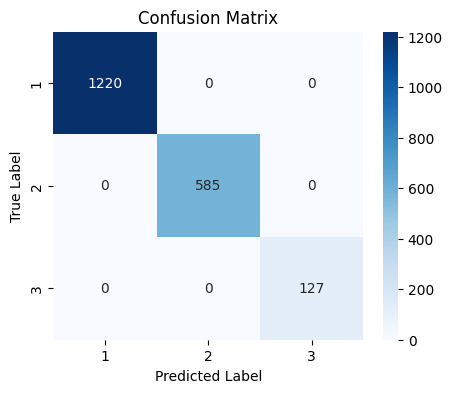

In [ ]:
from pyspark.mllib.evaluation import MulticlassMetrics
import seaborn as sns
import matplotlib.pyplot as plt

predictionAndLabels = predict.select("prediction", "outlete_size_num").rdd

metrics = MulticlassMetrics(predictionAndLabels)

confusion_matrix = metrics.confusionMatrix().toArray()
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix, annot=True, fmt="g", cmap="Blues", xticklabels=[1,2,3], yticklabels=[1,2,3])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

**Decision Tree**

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol="scaled_features", labelCol='outlete_size_num',maxDepth=7)
model = dt.fit(train_data)
predict = model.transform(test_data)

In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol='outlete_size_num')
accuracy = evaluator.evaluate(predict)

# Display the accuracy
print("Decision Tree Accuracy:", accuracy)

Decision Tree Accuracy: 1.0


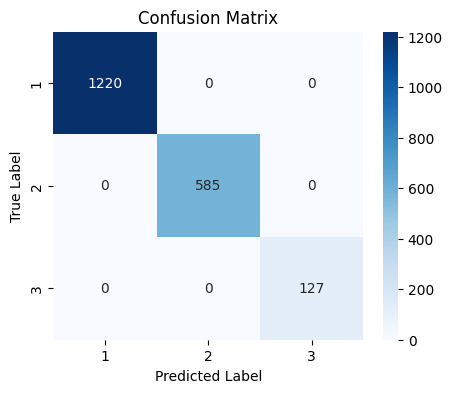

In [ ]:
predictionAndLabels = predict.select("prediction", "outlete_size_num").rdd

metrics = MulticlassMetrics(predictionAndLabels)

confusion_matrix = metrics.confusionMatrix().toArray()
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix, annot=True, fmt="g", cmap="Blues", xticklabels=[1,2,3], yticklabels=[1,2,3])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

**Random Forest**

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
random = RandomForestClassifier(featuresCol="scaled_features", labelCol='outlete_size_num',numTrees=500)
model = random.fit(train_data)
predict= model.transform(test_data)

In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol='outlete_size_num')
accuracy = evaluator.evaluate(predict)

# Display the accuracy
print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 1.0


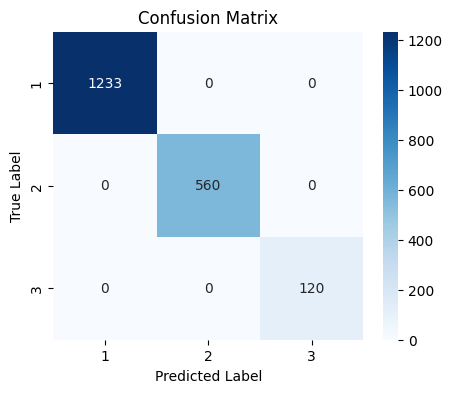

In [ ]:
predictionAndLabels = predict.select("prediction", "outlete_size_num").rdd

metrics = MulticlassMetrics(predictionAndLabels)

confusion_matrix = metrics.confusionMatrix().toArray()
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix, annot=True, fmt="g", cmap="Blues", xticklabels=[1,2,3], yticklabels=[1,2,3])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()